In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [4]:
sim1 = pd.read_csv('/home/rute/Pesquisa/newData/simout_1.csv')
sim1.head()

,tout,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41
0,0.01,0.27103,3649.7,4451.3,9.2231,32.393,47.560,2799.0,64.996,122.90,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986
1,0.02,0.27185,3689.3,4444.5,9.2526,32.181,47.771,2799.1,64.358,122.89,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986
2,0.03,0.27124,3645.2,4444.6,9.2110,32.627,47.649,2799.0,63.644,122.92,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986
3,0.04,0.27062,3653.2,4459.6,9.3142,32.493,47.579,2798.6,64.830,122.92,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986
4,0.05,0.27134,3668.2,4486.7,9.2479,32.295,47.595,2799.2,64.585,122.90,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986


In [125]:
def sig_corr(x1, x2, wlag, t_amostragem, x, y):
    correlations = np.zeros(wlag)
    for i in np.arange(0, wlag):
        correlations[i] = (1/(len(x1) - i))*np.dot(x1[i:],x2[:(len(x2) - i)])
    max_index = np.argmax(np.abs(correlations))
    return np.array([max_index*t_amostragem, correlations[max_index]])

In [6]:
def normalize_dfs(dfs):
    all_dfs = pd.concat(dfs)
    norm_dfs = []
   
    all_dfs_norm =  (all_dfs - all_dfs.mean())/all_dfs.std()
    all_dfs_norm['tout'] = all_dfs['tout']
    
    num_linhas = int(len(all_dfs)/len(dfs))
    num_blocks = int(len(all_dfs)/len(dfs[0]))
    
    for i in np.arange(0, num_blocks):
        df = all_dfs_norm.iloc[(i*num_linhas) : (i*num_linhas + num_linhas),:]
        norm_dfs.append(df)
    return norm_dfs
        

In [167]:
def get_dfs(init, end):
    dfs = []
    for i in np.arange(init,end):
        dfs.append(pd.read_csv('/home/rute/Pesquisa/newData/simout_' + str(i) + '.csv'))
    return dfs

In [7]:
#reading dfs
dfs_fail_0  = get_dfs(291,301)
dfs_fail_25 = get_dfs(301, 311)
dfs_fail_50 = get_dfs(311,321)
dfs_fail_75 = get_dfs(321,331)
dfs_fail_100 = get_dfs(331,341)

In [165]:
def dfs_by_ft(init):
    dfs_ft = []
    for i in np.arange(init, init + 41, 10):
        dfs_ft.append(get_dfs(i, i+10))
    return dfs_ft


In [174]:
dfs_by_fail_3 = dfs_by_ft(391)

In [180]:
dfs_by_fail_4 = dfs_by_ft(441)

In [166]:
dfs_by_fail_2 = dfs_by_ft(341)

341 351
341 351
341 351
341 351
341 351
341 351
341 351
341 351
341 351
341 351
351 361
351 361
351 361
351 361
351 361
351 361
351 361
351 361
351 361
351 361
361 371
361 371
361 371
361 371
361 371
361 371
361 371
361 371
361 371
361 371
371 381
371 381
371 381
371 381
371 381
371 381
371 381
371 381
371 381
371 381
381 391
381 391
381 391
381 391
381 391
381 391
381 391
381 391
381 391
381 391


In [150]:
len(dfs_by_fail_2)

5

In [168]:
def mean_correlation(wlag, dfs = []):
    matrix_corr_list = []
    m_sum_complete = np.zeros([dfs[0].shape[1] -1 , dfs[0].shape[1] -1, 2])
    dfs_norm = normalize_dfs(dfs)
 
    for df in dfs_norm:
        tam_m = int(len(df.columns[1:]))
        m_corr = np.zeros((tam_m,tam_m,2))
        for i, x in enumerate(df.columns[1:]):
            for j, y in enumerate(df.columns[1:]):
                m_corr[i][j] = sig_corr(np.array(df[x]), np.array(df[y]),wlag, 0.01,x,y)
        matrix_corr_list.append(m_corr)
        
    for m in matrix_corr_list:
        m_sum_complete = np.add(m_sum_complete, m)
        
    m_sum_complete = m_sum_complete/len(dfs)
    
    return m_sum_complete

In [83]:
plt.show()

In [276]:
mean_0 =  mean_correlation(int(2/0.01), dfs_fail_0)
mean_matrix_0 =  mean_0[:,:,1]/np.diagonal(mean_0[:,:,1])

mean_25 = mean_correlation(int(2/0.01), dfs_fail_25)
mean_matrix_25 = mean_25[:,:,1]/np.diagonal(mean_25[:,:,1])

mean_50 = mean_correlation(int(2/0.01), dfs_fail_50)
mean_matrix_50 = mean_50[:,:,1]/np.diagonal(mean_50[:,:,1])

mean_75 = mean_correlation(int(2/0.01), dfs_fail_75)
mean_matrix_75 = mean_75[:,:,1]/np.diagonal(mean_75[:,:,1])

mean_100 =  mean_correlation(int(2/0.01), dfs_fail_100)
mean_matrix_100 = mean_100[:,:,1]/np.diagonal(mean_100[:,:,1])

In [277]:
m = mean_matrix_0/mean_matrix_75


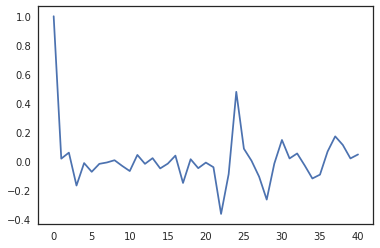

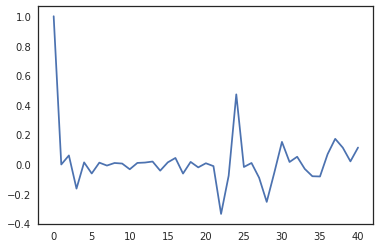

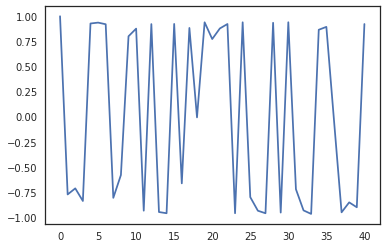

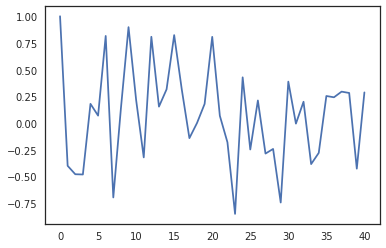

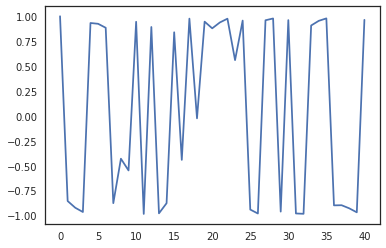

In [232]:
mean_matrix_0[0,:]
plt.plot(np.arange(0,41),mean_matrix_0[0,:])
plt.show()

plt.plot(np.arange(0,41),mean_matrix_25[0,:])
plt.show()

plt.plot(np.arange(0,41), mean_matrix_50[0,:])
plt.show()

plt.plot(np.arange(0,41), mean_matrix_75[0,:])
plt.show()

plt.plot(np.arange(0,41), mean_matrix_100[0,:])
plt.show()

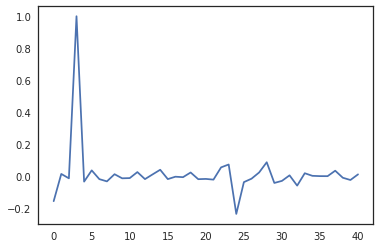

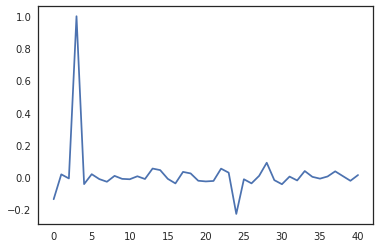

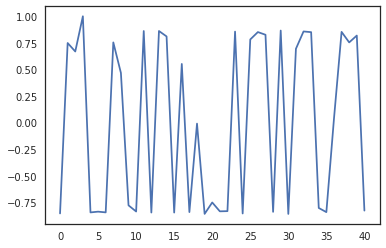

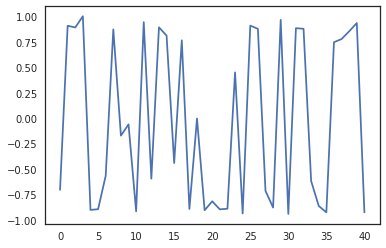

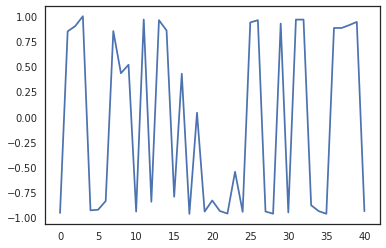

In [270]:
plt.plot(np.arange(0,41),mean_matrix_0[3,:])
plt.show()

plt.plot(np.arange(0,41),mean_matrix_25[3,:])
plt.show()

plt.plot(np.arange(0,41), mean_matrix_50[3,:])
plt.show()

plt.plot(np.arange(0,41), mean_matrix_75[3,:])
plt.show()

plt.plot(np.arange(0,41), mean_matrix_100[3,:])
plt.show()

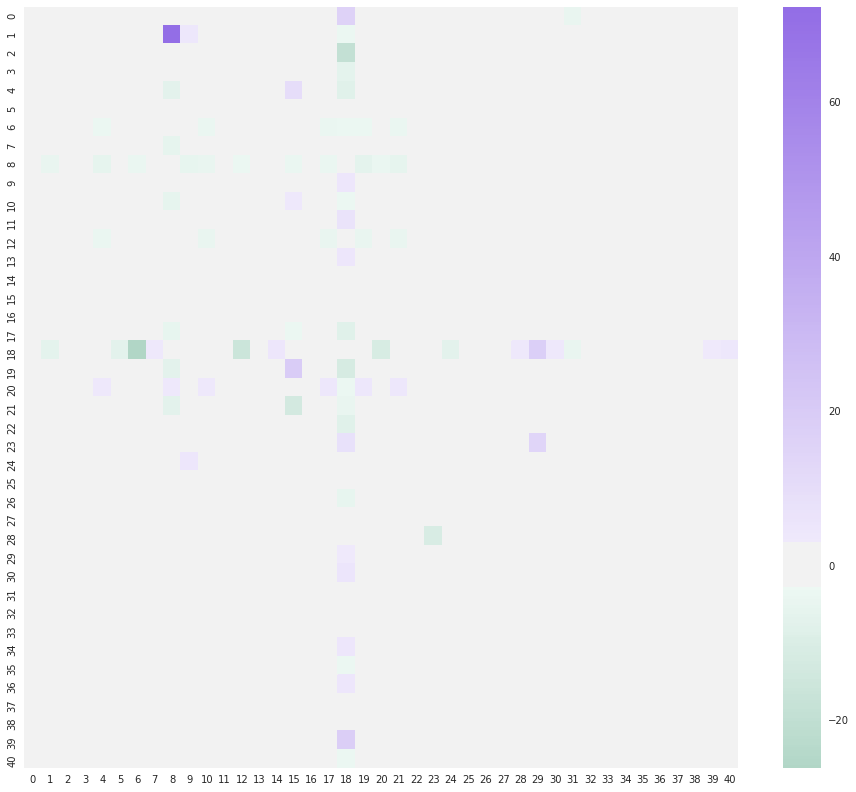

In [278]:
sns.set(style="white")
f, ax = plt.subplots(figsize=(16, 14))
cmap = sns.diverging_palette(150, 275, s=80, l=55, as_cmap=True)

sns.heatmap(m, cmap=cmap, center=0)
plt.show()



In [236]:
def get_most_corr_var(threshold, matrix):
    most_correlated_var = []
    for i in np.arange(0, len(matrix)):
        for j in np.arange(0, len(matrix)):
            if (np.abs(matrix[i][j]) > threshold and i != j):
                pair_value = [i, j, matrix[i,j]]
                most_correlated_var.append(pair_value)
    return most_correlated_var   
                   

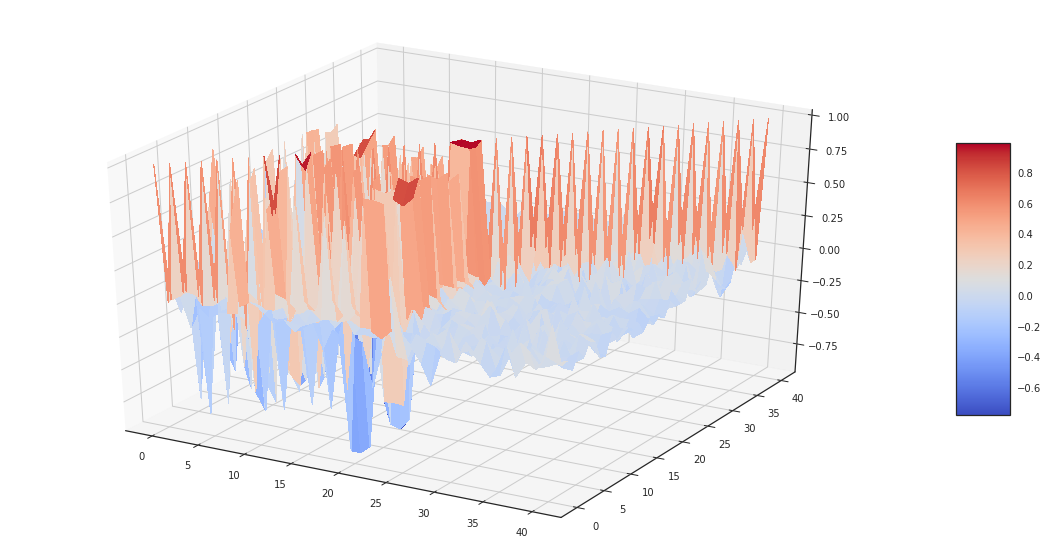

In [266]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(np.arange(0,41), np.arange(0,41))
s = ax.plot_surface(X, Y, mean_matrix_0, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(s, shrink=0.5, aspect=5)
plt.show()